In [2]:
import ROOT
import math
# Colors
from ROOT import kYellow, kBlue, kRed, kGreen

Welcome to JupyROOT 6.14/04


In [ ]:
def getTHLimits(files, ttree, var):
    g_min = 99999999999.
    g_max = -99999999999.
    for f in files:
        aux = ROOT.TFile.Open(f)
        tree = aux.Get(ttree)
        maxv=int(round(tree.GetMaximum(var)))
        minv=int(round(tree.GetMinimum(var)))
        if(minv < g_min):
            g_min = minv
        if(maxv > g_max):
            g_max = maxv
        return g_min-2.,g_max+2.

In [ ]:
def genHist(filename, ttree, var, hmin, hmax, signal=False):
    # To do: Check if var is vector or not
    # Open file .root
    file = ROOT.TFile.Open(filename)
    # Select tree. Usually we'll use "Nominal"
    tree = file.Get(ttree)
    # Create empty histogram hist
    hist = ROOT.TH1F("h",var,100,hmin,hmax) # (minv-1,maxv+1) range of the histogram
    # For each row in the tree, 
    for entry in tree:
        # we'll select the value in the var column
        event = getattr(entry,var)
        # and fill the histogram with it
        hist.Fill(event)
    # Set the histogram memory direction
    hist.SetDirectory(0)        
    ROOT.TH1F.AddDirectory(False)
    return hist

In [12]:
ttree = "Nominal"
var = "m_DTphi"
files = ["ttbar-all.root", "Wtaunu_221-all.root", "WW_Pw-all.root"] 
#files = ["ZtautauB_221.root", "ZtautauC_221.root", "ZtautauL_221.root"]

# Stacked histogram object
hs = ROOT.THStack("hs"," stacked histograms")
# colors must be bigger or size equal to the files list.
colors = [kYellow, kBlue, kRed, kGreen]
hmin, hmax = getTHLimits(files, ttree, var)
hists = []

# Get stacked histogram of var for each file. 
for i in range(len(files)):
    hist = genHist(files[i], ttree, var, hmin, hmax)
    hist.SetFillColor(colors[i])
    #hist.GetXaxis().SetLimits(-3,3)
    #hist.GetYaxis().SetLimits(0, 30)
    hists.append(hist)
    hs.Add(hist)
    

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


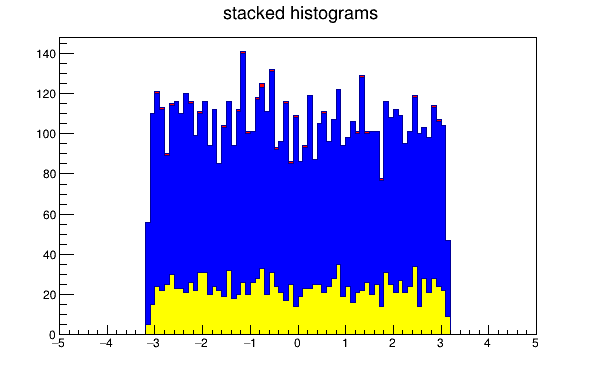

In [13]:
# Plot histogram
c = ROOT.TCanvas("Canvas",var,600,400)
hs.Draw()
#hs.GetXaxis().SetRangeUser(-3.5,3.5)
#hs.GetYaxis().SetRangeUser(0,90)
c.Draw()